# Load dataset

In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "test_sine.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [2]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [3]:
import stabledynamics  # Replace with the actual name of your model class

# Load the model
model_props = {
    "latent_space_dim": 2,
    "a": 0.001,
    "projfn": "PSD-REHU",
    "projfn_eps": 0.01,
    "smooth_v": 0,
    "hp": 64,
    "h": 64,
    "rehu": 0.005,
    "dt": 1
}
stabledynamics.configure(model_props)  # Replace with the actual name of your model class
model = stabledynamics.model

In [4]:
# Load the state dict
state_dict_path = "st3.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

NextStateGenerator(
  (network): Dynamics(
    (fhat): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=2, bias=True)
    )
    (V): MakePSD(
      (f): ICNN(
        (W): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64x2]
            (1): Parameter containing: [torch.float64 of size 64x2]
            (2): Parameter containing: [torch.float64 of size 1x2]
        )
        (U): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64x64]
            (1): Parameter containing: [torch.float64 of size 1x64]
        )
        (bias): ParameterList(
            (0): Parameter containing: [torch.float64 of size 64]
            (1): Parameter containing: [torch.float64 of size 64]
            (2): Parameter containing: [torch.float64 of size 1]
        )
        (act): ReH

# Run Predictions

In [17]:
st = data.iloc[1:2]
st['Xt'] = 0.9
st['Xt-1'] = 0.9
start = to_variable(torch.tensor(np.array(st)), cuda=False)
path = []
INDEX = 0
for i in range(1, 1000):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    print(start[0][INDEX].item())
    path.append(start[0][INDEX].item())

/tmp/ipykernel_28487/318393202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt'] = 0.0
/tmp/ipykernel_28487/318393202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Xt-1'] = 0.0


0.01917588251503856
0.07262998844692752
0.1484095293525835
0.23523006388319773
0.32973457395378264
0.42028484250712145
0.5060374021153576
0.5765211658591641
0.6206435672868499
0.6255979692089859
0.6112285833121327
0.5975804932002329
0.5845532642585097
0.5721202669973245
0.5602556516483581
0.5483061664417321
0.5359233469356763
0.5230930463917703
0.5098003381185604
0.49602989376872947
0.4815048296632382
0.46580052919794374
0.4492878744353431
0.4328876117384181
0.41660013377987587
0.4004266959545555
0.38447069124099004
0.3692663918108376
0.35477976784896026
0.34097863844832393
0.32783210414655245
0.31519761611586905
0.30272492381759336
0.28990802719254183
0.278798480747022
0.2752757619786464
0.2817642256211338
0.2980707634603102
0.32171371398425624
0.35232095279187386
0.3858858749384999
0.4148213088618364
0.4323097477907293
0.4325125530256479
0.41938267149933195
0.4031811387926373
0.387103198103135
0.3717748167130029
0.35716966413715173
0.34325533305441797
0.33000071053954233
0.3173385931

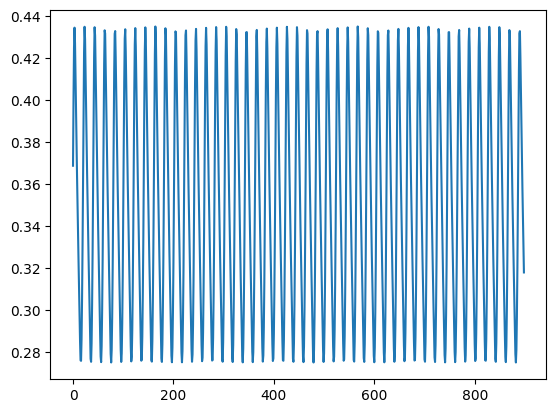

In [18]:
plt.plot(path[100:10000])

In [7]:
# total_diff = 0
# for i in range(0, len(path) - 2):
#     total_diff += abs(path[i] - path[i + 1])

# print(total_diff / (len(path) - 2))